## Spam or Ham Email Analysis - An Exploration Into Probability Theory and Random Variables in Machine Learning

#### Author: Andrew Tran

## Machine Learning Theory - Naive-Bayes Classification

Before we apply a simple example of `Naive-Bayes Classification` in practice, I would like to spend time discussing the probability theory associated with this algorithm. 

`Naive-Bayes Classification` is based on the traditional `Bayes' Theorem` that would typically learn in an introductory-level `Probability and Statistics` course. This theorem would typically calculate the probability of an event, given prior compuations of co-related and/or conditional events relating to the one in question. Here is the formula of `Bayes' Theorem` (shown below):

$$ P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}, where $$

P(`A` ∣ `B`) is the probability of class `A` given the observed features `B`, <br>
P(`B` ∣ `A`) is the probability of observing features `B` given class `A`, <br>
P(`A`) is the prior probability of class `A`, <br>
and P(`B`) is the probability of observing features `B`.

To describe the `Naive` part of this term, it denotes the instance that the potentially correlated events being computed together in this theorem are going to be assumed to be (completely or mostly) conditionally independent, given the class label. To make sure there are no knowledge gaps here, two events (suppose they are called Events `A` and `B`) are considered `"conditonally independent"` if and only if a third event (suppose we call it Event `C`) if the computed occurence (or non-occurence) of such an event does not provide any information of either the two sub-events `A` and `B`.

There are three main different types of `Naive-Bayes` Classifiers:

1. `Gaussian Naive-Bayes` Classification: This type of classifier is used more for <b>`continuous`</b> datasets and assumes that the features that you are comparing follow the `Gaussian (Normal)` probabilisitic distribution.
2. `Multinomial Naive-Bayes` Classification: This type of classifier is used more for <b>`discrete`</b> datasets, primarily used more for document/text classification purposes.
3. `Bernoulli Naive-Bayes` Classification:  This type of classifier is used more for <b>`discrete`</b> datasets, primarily used more for boolean-like data and/or binary classification purposes.

## Blog Post Inspiration and Objectives

In this blog post, I was hoping to quickly explore the `Naive-Bayes` classifier as discussed in class in more detail. A simple and classic example found everywhere in data science and Machine Learning examples was the classification of emails as `Spam` or `Not-Spam (i.e. Ham)`. The premise of this basic study is based on the document-model created around each email: we can use techniques of word-counting via vectorization as well as basic sentiment analysis of the connotation of words used in the text (done in a quantiative and methodical way) to determine if an email is considered Spam or Not-Spam (Ham). This example leans naturally to a `Naive-Bayes` classifcation problem given how the dataset is discrete and (almost completely) exhibits conditional independence (the determination of Spam vs. Ham emails is independent between different emails). With that said, let's try to analyze this topic with some Machine Learning: 

## Data Preprocessing - Cleaning and Analytics

In [1]:
# Imported needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
import seaborn as sns
color = sns.color_palette()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.preprocessing import StandardScaler
plt.style.use("fivethirtyeight")

First, we will read and display the initial dataset in our file system for this blog post, downloaded from Kaggle. This dataset contains loads of valuable information such as all relevant email classifier information that you would typically document such as the email message content and whether every email was listed as an objective `"Spam"` or legitimate (not-spam i.e. `"Ham"`) case.

In [2]:
# Reading and displaying the initial dataset (ignoring any warnings or errors)
df = pd.read_csv("datasets/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


For clarity on the constraints and parameters of the working datasets, I went to find high-level exploratory statistics on all of the datasets: shape, information about all of the entries, etc.

In [3]:
# Determining the shape of the initial dataset
df.shape

(5572, 5)

In [4]:
# Getting a sample of the initial dataset through the seeing the first 10 entries
# completely in the dataset
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
# Figuring out all of the columns (and their names) available for me to use in 
# the dataset
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Removed unnecessary columns not needed for Machine Learning analysis
df.drop(labels=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Renaming the columns to be more readable
df.rename(columns={"v1": "S/H-Label", "v2": "Email-Message"}, inplace=True)
df

,S/H-Label,Email-Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Getting basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S/H-Label      5572 non-null   object
 1   Email-Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
# Figuring out the number of 'null'/'NaN' elements in the dataset (i.e. if NaN 
# filling is needed or not)
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

S/H-Label        0
Email-Message    0
dtype: int64


S/H-Label        0.0
Email-Message    0.0
dtype: float64

In [11]:
df["S/H-Label"].value_counts()

S/H-Label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
df.describe()

,S/H-Label,Email-Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
# Creates a "Length" column, detailing the number of words in each respective email entry
df["Length"] = df["Email-Message"].apply(len)
df

,S/H-Label,Email-Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


Here, I am trying to offer some visualizations of the cleaned dataset before we pass it over for Machine Learning training and prediction. In this blog post, I wanted to visualize the spread of the range in length of email messsages as a histogram in the graph across emails. The first histogram just displays the original histogram with no modification while the second histogram portrays the original histogram with also additional labels indiciating the differentiation of `Spam` and `Non-Spam` (`"Ham"`) emails as two separated histogram placed together on one singular visual plot for comparison purposes.

C:\Users\andre\AppData\Local\Temp\ipykernel_9932\2669701367.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["Length"], palette=sns.color_palette("husl", 8), kde=False)


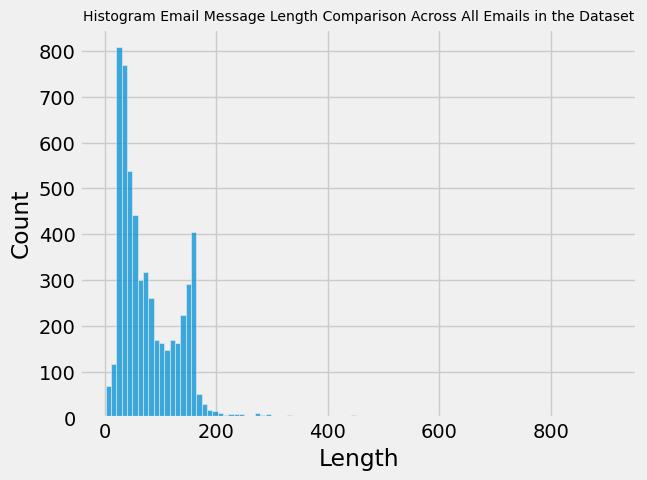

In [14]:
# Histogram plot illustrating the Email Message Length across all of the emails
sns.histplot(df["Length"], palette=sns.color_palette("husl", 8), kde=False)
plt.rcParams["font.size"] = 7
plt.title("Histogram Email Message Length Comparison Across All Emails in the Dataset")
plt.show()

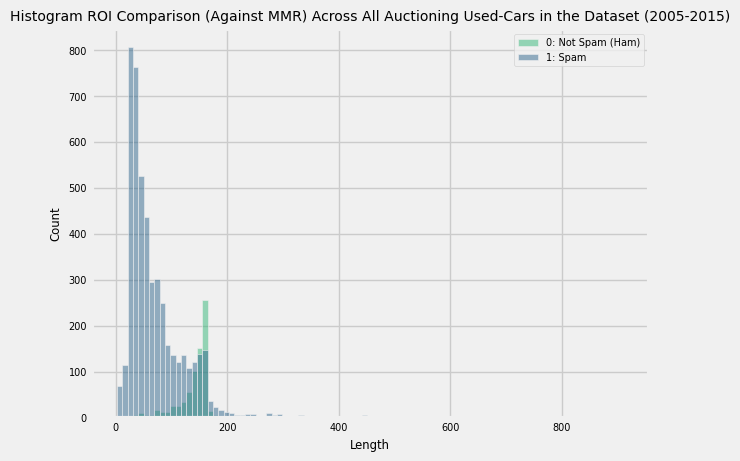

In [15]:
# Histogram plot illustrating the ROI across all of the cars
sns.histplot(data=df, x="Length", hue="S/H-Label", palette=sns.color_palette("viridis", 2), kde=False)
plt.legend(labels=["0: Not Spam (Ham)", "1: Spam"])
plt.rcParams["font.size"] = 7
plt.title("Histogram ROI Comparison (Against MMR) Across All Auctioning Used-Cars in the Dataset (2005-2015)")
plt.show()

In [16]:
# Convert any needed categorical columns into numerical ones via factorizing (integer mapping)
df["S/H-Label"] = pd.factorize(df["S/H-Label"])[0]
df

,S/H-Label,Email-Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


## Machine Learning - Model Training and Evaluation

Great, now we are onto the Machine Learning part of the blog post!

Since the dataframe is now properly cleaned, sorted, and integer-mapped by this point, I had split the respective dataframe into the train and test datasets for the Machine Learning model with 80% going to the training dataset and the last 20% going to the test dataset. Fortunately, because order of the data sequentially does not matter here, I was able to utilize the `train_test_split` function for shuffling and randomization, making the future-generated Machine Learning model more unpredictable but also more objective in its returned model results. 

In [17]:
X = df["Email-Message"]
y = df["S/H-Label"]

print("X Shape:", X.shape)
print("Y Shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

X Shape: (5572,)
Y Shape: (5572,)


To implement the desired `Bag-of-Words` Machine-Learning analysis in a short and succinct manner, I have added to my methods the `CountVectorizer` class, which helps in doing the manual data cleaning labor towards converting all of our email message text into lowercase, removes all punctuation marks, and removes all stop words as defined in `scikit-learn` by default from our original document to analyze. Fitting the training data as well as transforming the testing data here is needed as a prerequisite to ensure the emails are in the approrpriate state before being passed to our selected `Naive-Bayes` classifier.

In [18]:
# Instantiate the CountVectorizer object
vector_counter = CountVectorizer()

# Fit the training data to the CountVectorizer
X_train_vectorized = vector_counter.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vector_counter.transform(X_test)

Here, we put our selected `Naive-Bayes` classifier into practice, testing if the model can accurately predict the emails as either `Spam` or `Not-Spam` (`"Ham"`). Note that we selected `MultinomialNB` option rather than `GaussianNB` because of the nature of the data passed to the classifier is discrete rather than continuous. The input data we are passing in here are the word counts of every email entry for text classification. A more appropriate use of `GaussianNB` would be for continuous input data that has a Gaussian (Normal) distribution across the data. 

In [19]:
# Initialize the appropriate Naive-Bayes classifier object
naive_bayes_model = MultinomialNB()

# Fit the training data to the NB model
naive_bayes_model.fit(X_train_vectorized, y_train)

# Predict the results of the testing data from the given NB model
y_pred = naive_bayes_model.predict(X_test_vectorized)

Test Results:
Accuracy Score: 98.39%
_______________________________________________
ROC AUC Score: 94.56%
_______________________________________________
Precision Score: 98.53%
_______________________________________________
Recall Score: 89.33%
_______________________________________________
F1 Score: 93.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.983657    0.985294  0.983857     0.984475      0.983877
recall       0.997927    0.893333  0.983857     0.945630      0.983857
f1-score     0.990741    0.937063  0.983857     0.963902      0.983520
support    965.000000  150.000000  0.983857  1115.000000   1115.000000
_______________________________________________
Confusion Matrix:
[[963   2]
 [ 16 134]]


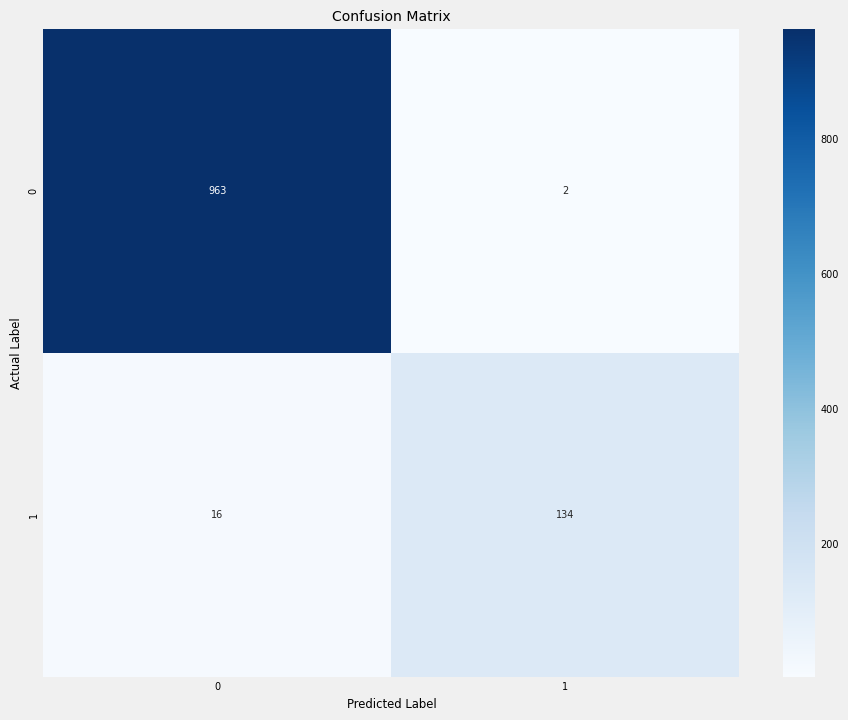

In [20]:
# Display the accuracy statistics and the confusion matrix of the Naive-Bayes classifier 
# predictions
clf_report = pd.DataFrame(classification_report(y_true=y_test, y_pred=y_pred, output_dict=True, zero_division=0))
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Compute and output statistics for Precision, Accuracy, and ROC AUC Scores as well as the Classifcation Report
print("Test Results:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_true=y_test, y_pred=y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"ROC AUC Score: {roc_auc_score(y_true=y_test, y_score=y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Precision Score: {precision_score(y_true=y_test, y_pred=y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Recall Score: {recall_score(y_true=y_test, y_pred=y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"F1 Score: {f1_score(y_true=y_test, y_pred=y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix:\n{conf_matrix}")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.rcParams["font.size"] = 7
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

## Conclusions

- After completing this blog-post, when seeing that my `Naive-Bayes` classifier model predicted an accuracy score of approximately `98%`, I realize the effectiveness of a `Naive-Bayes` classifier model in terms of document/text classification and analysis because of its ability to be intuitive to execute (lines of code) and its ability to understand its algorithmic processes, its efficiency with higher-dimensional data, great ability to abstract way the difficulties of text and document analysis (making it great more advanced Natural-Language Processing (NLP) applications), and wonderful for focusing on the general important features rather than being skewed by irrelevant features.

- Ultimately, I learned a great deal from the blog post experience as I now better understand how to properly utilize `Naive-Bayes Classifiers` through applying it to a practical, every-day dilemma in our society.

## Reference Sources and Citations (IEEE Format)

To complete this blog post, I used the following online sources as references for developing this:

[1] SMS Spam Collection Dataset: 

- UCI Machine Learning, "SMS Spam Collection Dataset", 2016. [Online]. Available: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset. [Accessed 22-Nov.-2023].

[2] Naive Bayes Classifier Theory Explained: 

- AnalyticsVidhya, "Naive Bayes Classifier Explained: Applications and Practice Problems of Naive Bayes Classifier", Nov.-2023. [Online]. Available: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/#:~:text=This%20theorem%20is%20based%20on,true%20in%20real%2Dworld%20scenarios. [Accessed 24-Nov.-2023].

[3] Naive-Bayes Classifier Practical Reference: 

- M. Siddhartha, "SMS Spam Classifier: Naive Bayes ML Algo", 2018. [Online]. Available: https://www.kaggle.com/code/sid321axn/sms-spam-classifier-naive-bayes-ml-algo. [Accessed 22-Nov.-2023].